# Install Simple Transformers library

In [2]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

simpletransformers==0.61.4


In [3]:
!pip install tokenizers==0.9.4

# Load the dataset

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/stemaway/Codeacademy_Webscrapper_20210107154307.csv')

print(df.shape)
df.head()

(5464, 8)


,Unnamed: 0,Topic Title,Category,Tags,Leading Comment,Other Comments,Likes,Views
0,0,[How to] Format code in posts,Getting Started,[],Codecademy Discuss posts are parsed with Markd...,[],21,13.9k
1,1,Guide: A list of how-to’s for giving and recei...,Getting Started,[],Technical guides will teach you how to use the...,[],0,0
2,2,Guide: Learn about our community forums,Getting Started,[],Take a moment and read through each of these b...,[],0,0
3,3,[How-to] Create a topic that everyone will read,Getting Started,[],A great topic is one that provides potential h...,[],0,0
4,4,[Learn More] How the forum is organized,Getting Started,[],"With Codecademy Community forums, conversation...",[],0,0


In [6]:
df['Category'].unique()

array(['Getting Started', 'Get Help', 'Community', 'Projects', 'FAQ'],
      dtype=object)

In [7]:
df.drop(columns= ['Unnamed: 0', 'Likes', 'Views'], inplace=True)

In [8]:
df.head()

,Topic Title,Category,Tags,Leading Comment,Other Comments
0,[How to] Format code in posts,Getting Started,[],Codecademy Discuss posts are parsed with Markd...,[]
1,Guide: A list of how-to’s for giving and recei...,Getting Started,[],Technical guides will teach you how to use the...,[]
2,Guide: Learn about our community forums,Getting Started,[],Take a moment and read through each of these b...,[]
3,[How-to] Create a topic that everyone will read,Getting Started,[],A great topic is one that provides potential h...,[]
4,[Learn More] How the forum is organized,Getting Started,[],"With Codecademy Community forums, conversation...",[]


In [9]:
df['post'] = df['Topic Title'] + ' ' + df['Tags'] + ' ' + df['Leading Comment']

In [10]:
import pandas as pd
import numpy as np
from numpy import random
import nltk
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
%matplotlib inline

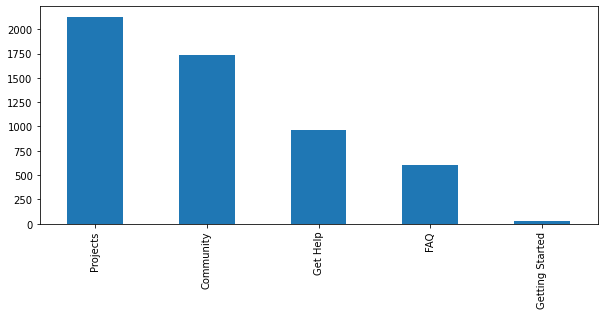

In [11]:
my_categories = ['Getting Started', 'Get Help', 'Community', 'Projects', 'FAQ']
plt.figure(figsize=(10,4))
df.Category.value_counts().plot(kind='bar');

In [12]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text
    
df['post'] = df['post'].apply(clean_text)

In [13]:
class_list = ['Getting Started', 'Get Help', 'Community', 'Projects', 'FAQ']
new_df = pd.DataFrame()
new_df['post'] = df['post']
new_df['category'] = df['Category']
new_df['post'] = new_df['post'].apply(lambda x: str(x))
new_df['category'] = new_df['category'].apply(lambda x: str(x))

In [14]:
len(class_list)

5

In [15]:
new_df.head()

,post,category
0,how to format code in posts codecademy di...,Getting Started
1,guide: a list of how-to s for giving and recei...,Getting Started
2,guide: learn about our community forums tak...,Getting Started
3,how-to create a topic that everyone will rea...,Getting Started
4,learn more how the forum is organized wit...,Getting Started


In [16]:
# changing class names (text) to numbers (a necessity for simpletransformers library)
new_df['category'] = new_df.apply(lambda x:  class_list.index(x['category']),axis=1)
new_df.head()

,post,category
0,how to format code in posts codecademy di...,0
1,guide: a list of how-to s for giving and recei...,0
2,guide: learn about our community forums tak...,0
3,how-to create a topic that everyone will rea...,0
4,learn more how the forum is organized wit...,0


In [17]:
new_df['category'].unique()

array([0, 1, 2, 3, 4])

In [18]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(new_df, test_size=0.10)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (4917, 2)
test shape:  (547, 2)


# Load pre-trained model

In [19]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-uncased",
    num_labels=11,
    args=train_args
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

# Train model

In [20]:
# Train the model
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:449: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/4917 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/615 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/615 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/615 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/615 [00:00<?, ?it/s]

(2460, 0.24359454247138437)

In [21]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/547 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/69 [00:00<?, ?it/s]

In [22]:
result

{'acc': 0.9195612431444241,
 'eval_loss': 0.4598957779838373,
 'f1': 0.9195612431444241,
 'mcc': 0.8855394430061516}

# save and load the model

In [23]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [27]:
save_model('outputs','codeacademy_discuss_forum-bert-categclass')

In [28]:
!tar -zxvf ./codeacademy_discuss_forum-bert-categclass.tar.gz

outputs/vocab.txt
outputs/config.json
outputs/model_args.json
outputs/training_args.bin
outputs/special_tokens_map.json
outputs/eval_results.txt
outputs/tokenizer_config.json
outputs/pytorch_model.bin


In [29]:
!rm -rf outputs

# Test the loaded model on a real example

In [30]:
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('codeacademy_discuss_forum-bert-categclass')

In [31]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "outputs/",
    num_labels=11,
    args=train_args
)

In [32]:
import re
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text

In [33]:
class_list = ['Getting Started', 'Get Help', 'Community', 'Projects', 'FAQ']

post = "What path to take / language to learn"

predictions, raw_outputs = model.predict([clean_text(post)])

print(class_list[predictions[0]])
# Label : Getting Started

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Community


In [34]:
post2 = input('Your forum post: ')

Your forum post: [Tourist Attractions] Build Python Web Apps with Flask


In [35]:
print(clean_text(post2))

predictions, raw_outputs = model.predict([clean_text(post2)])

print(class_list[predictions[0]])
# Label : Get Help

 tourist attractions  build python web apps with flask


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Community


For post 1 & 2 our model could have misclassified the post because I only provided it as input the forum post without a title while I trained the model on a concatenation of both the title and post body. 

In [36]:
post3_title = input('Your forum post title: ')

Your forum post title: I need help deciding which code would be good for my application


In [37]:
post3_body = input('Your forum post body: ')


Your forum post body: Hi everyone, I know html, css and my website now runs on wordpress. I want to create a web application for my travel agency. Something like this website: klook.com 23 And maybe if it’s easy to learn, i would like to integrate flights using travelport’s universal API. Can anyone guide me choosing which language to learn? Python, Ruby or something else? Your help would be very much appreciated! Thank you!


In [38]:
post3 = post3_title + ' ' + post3_body
predictions, raw_outputs = model.predict([post3])

print(class_list[predictions[0]])
# Label : Community

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Community


In [39]:
post4_title = input('Your forum post title: ')
post4_body = input('Your forum post body: ')

Your forum post title: CoolTShirts.com Marketing Attribution Capstone Project – Peer Feedback
Your forum post body: Hi there! I think I did pretty well on this, but I’d love to hear whether my reasoning for the five campaigns I chose was sound. Thanks! Slideshow 16 SQL 1


In [40]:
post4 = post4_title + ' ' + post4_body

predictions, raw_outputs = model.predict([post4])

print(class_list[predictions[0]])
# Label :Projects

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Projects
